In [248]:
#1
import pandas as pd

olimpics=pd.read_csv('athlete_events.csv')
olimpics.head()

olimpics.describe()
olimpics.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [249]:

#2categories=['Sex','Age','Sport','Height','Weight','Games','Event','City','Season']
quants=['Team','NOC','Year']
ordinals=['Medal']

<AxesSubplot:xlabel='country'>

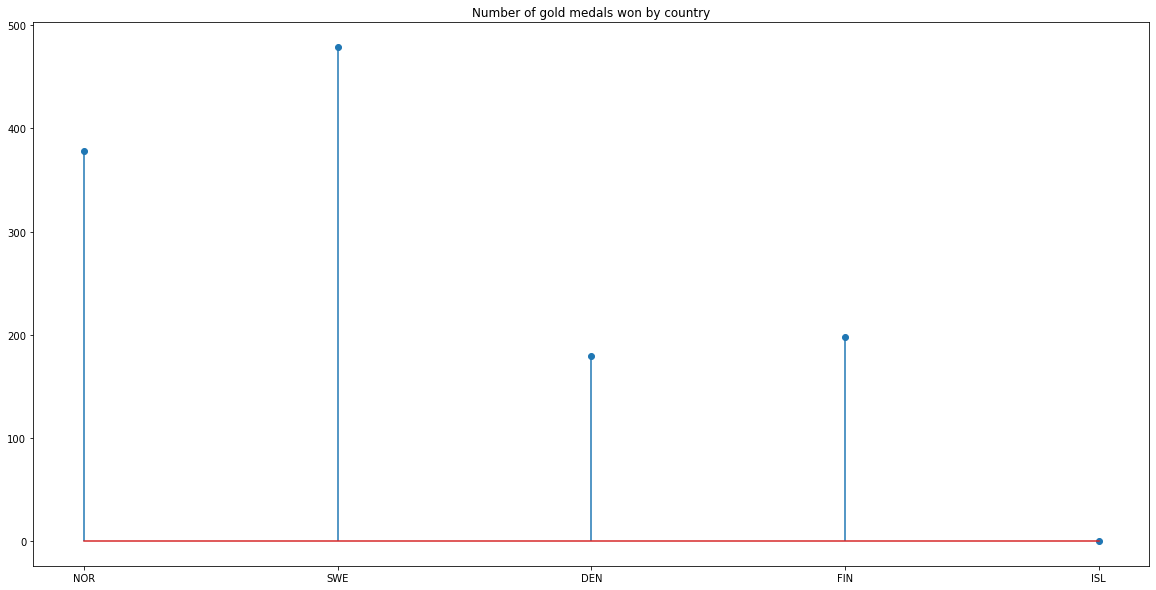

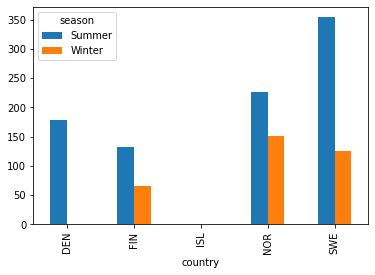

In [4]:

#3
import pandas as pd
import matplotlib.pyplot as plt

olimpics=pd.read_csv('athlete_events.csv')
olimpics=olimpics.dropna(subset=['Medal'])
olimpics=olimpics.reset_index(drop=True)

countries=['NOR','SWE','DEN','FIN','ISL']
medals=[]
for c in countries:
    tmp=olimpics[olimpics.NOC == c]
    tmp_g=tmp.groupby('Medal').size()
    if 'Gold' not in tmp_g.index:
        medals.append(0)
    else:
        medals.append(tmp_g['Gold'])

plt.figure(figsize=(20,10))
plt.title('Number of gold medals won by country')
plt.stem(countries,medals)


atr=[]
season=['Summer','Winter']
for c in countries:
    for s in season:
        tmp=olimpics[(olimpics.NOC==c) & (olimpics.Season==s)]
        tmp=tmp.groupby('Medal').size()
        if 'Gold' not in tmp.index:
            tmp_g=0
        else:
            tmp_g=tmp['Gold']
        atr.append({'country':c,'season':s,'gold':tmp_g})

atr=pd.DataFrame(atr)
p=atr.pivot(columns="season", index="country", values="gold")
p.plot(kind="bar")

#Barplots in my opinion are the best way to visualise the number of occurrencies of an event among different subjects. They make comparison very easy and straightforward.
#Every season has its own bar with different color so it is easier to distingush them. The height of a bar describes the amount of golden medals won by a country.
#Every cuntry has bars which depicts teh particular season.

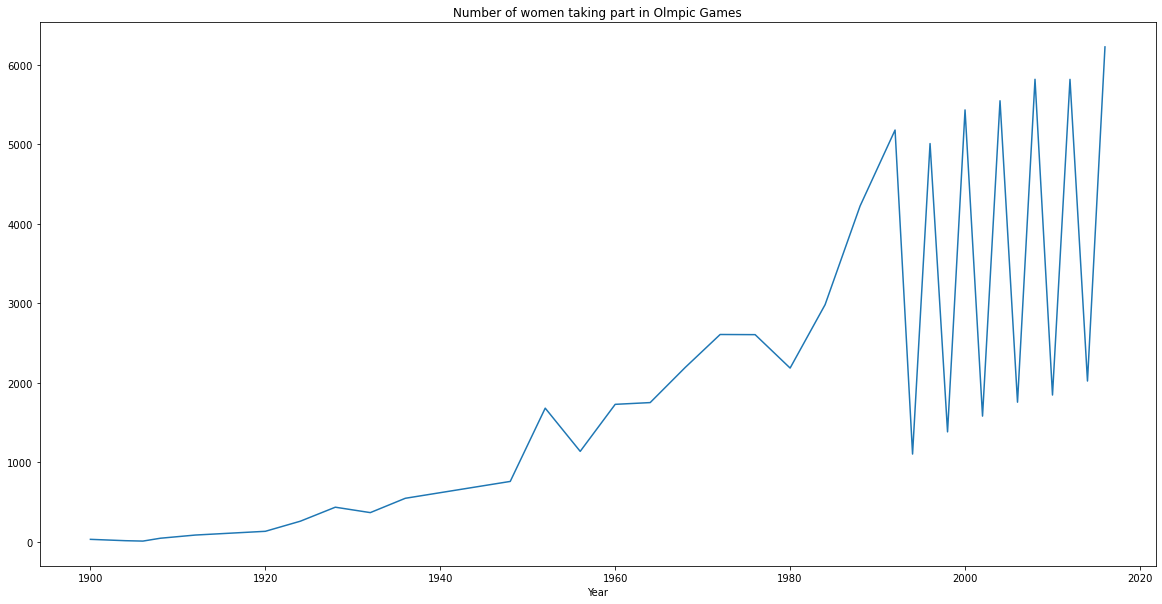

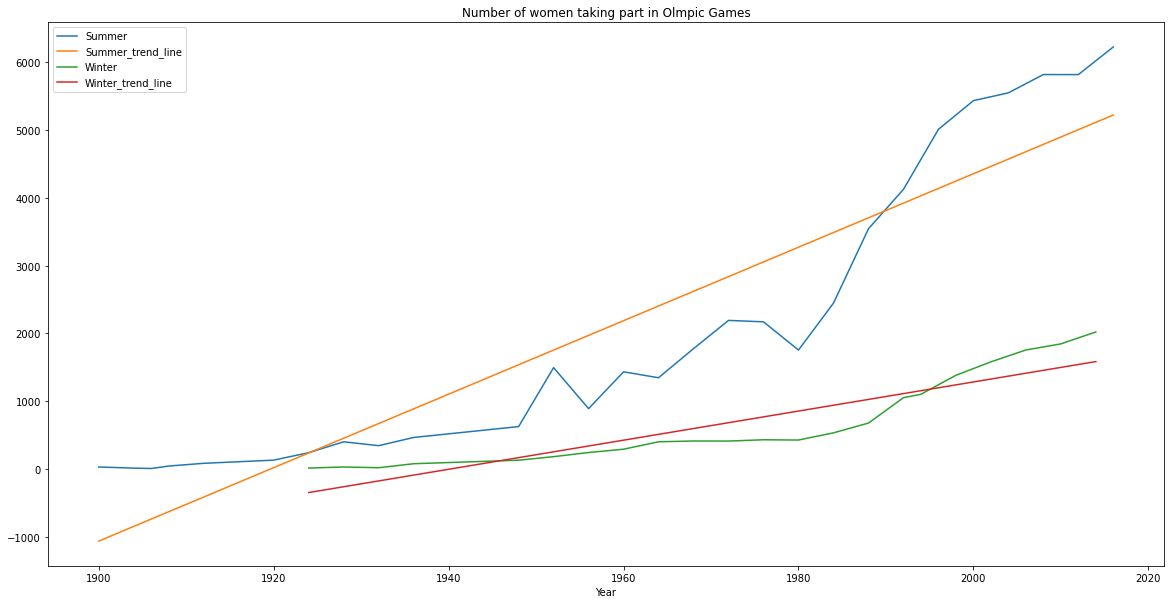

In [15]:
#4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

olimpics=pd.read_csv('athlete_events.csv')

olimpics_w=olimpics[olimpics.Sex=='F']
o=olimpics_w.groupby('Year').size()
plt.figure(figsize=(20,10))
plt.title('Number of women taking part in Olmpic Games')
o.plot()
plt.show()

#The spieks at the plot are the product of the difference between the number of females taking part in summer and winter olimpic games. At the beginning the number of participants
#were pretty much similar but later on  the gap between them started rising to the point where the spikes apeard.

olimpics_ws=olimpics[(olimpics.Sex=='F') & (olimpics.Season=='Summer')]
os=olimpics_ws.groupby('Year').size()
olimpics_ww=olimpics[(olimpics.Sex=='F') & (olimpics.Season=='Winter')]
ow=olimpics_ww.groupby('Year').size()

xs=np.polyfit(os.index,os.values,1)
fxs=np.poly1d(xs)
xw=np.polyfit(ow.index,ow.values,1)
fxw=np.poly1d(xw)

plt.figure(figsize=(20,10))
os.plot(label='Summer')
plt.plot(os.index,fxs(os.index),label='Summer_trend_line')
ow.plot(label='Winter')
plt.plot(ow.index,fxw(ow.index),label='Winter_trend_line')
plt.legend()
plt.title('Number of women taking part in Olmpic Games')
plt.show()

#Trend line shows that the growth rate of the number of participants of summer olimpic games is much higer then the winter olimic games. Therfore in my opinion there is no sense in
#analising aggregated data of summer and winter olimpic games.


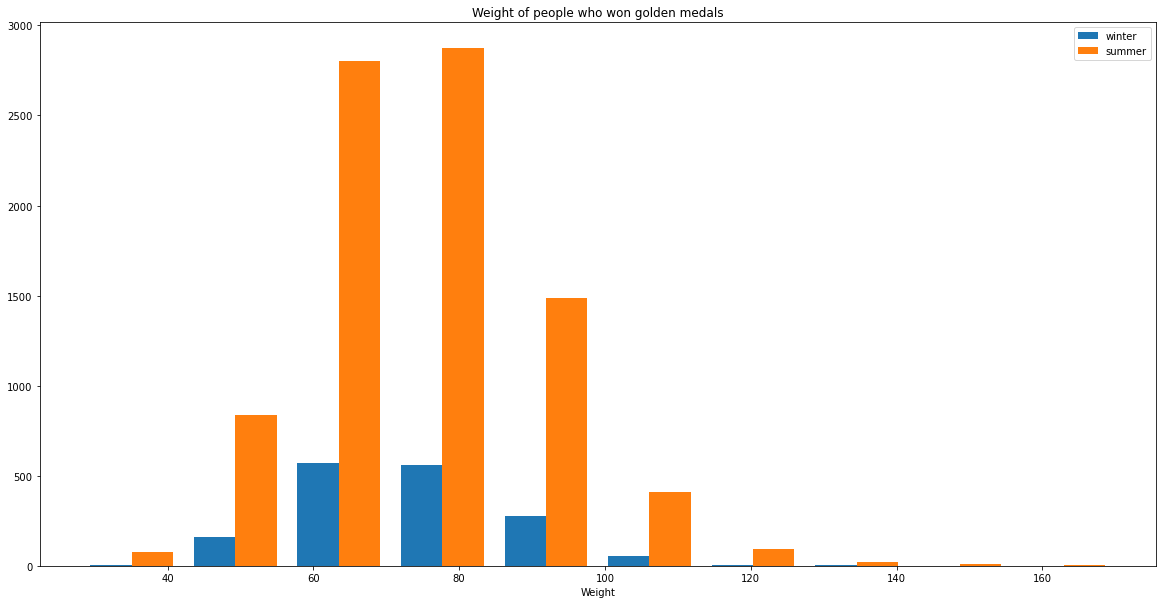

In [227]:
#5
import pandas as pd
import matplotlib.pyplot as plt

olimpics=pd.read_csv('athlete_events.csv')
olimpics=olimpics.dropna(subset=['Weight'])
olimpics=olimpics.reset_index(drop=True)

w=olimpics[(olimpics.Medal=='Gold') & (olimpics.Season=='Winter')]
s=olimpics[(olimpics.Medal=='Gold') & (olimpics.Season=='Summer')]
plt.figure(figsize=(20,10))
plt.hist([w.Weight,s.Weight],label=['winter','summer'])
plt.xlabel('Weight')
plt.legend()
plt.title('Weight of people who won golden medals')
plt.show()

Text(0.5, 1.0, 'Distibution of BMI over the years')

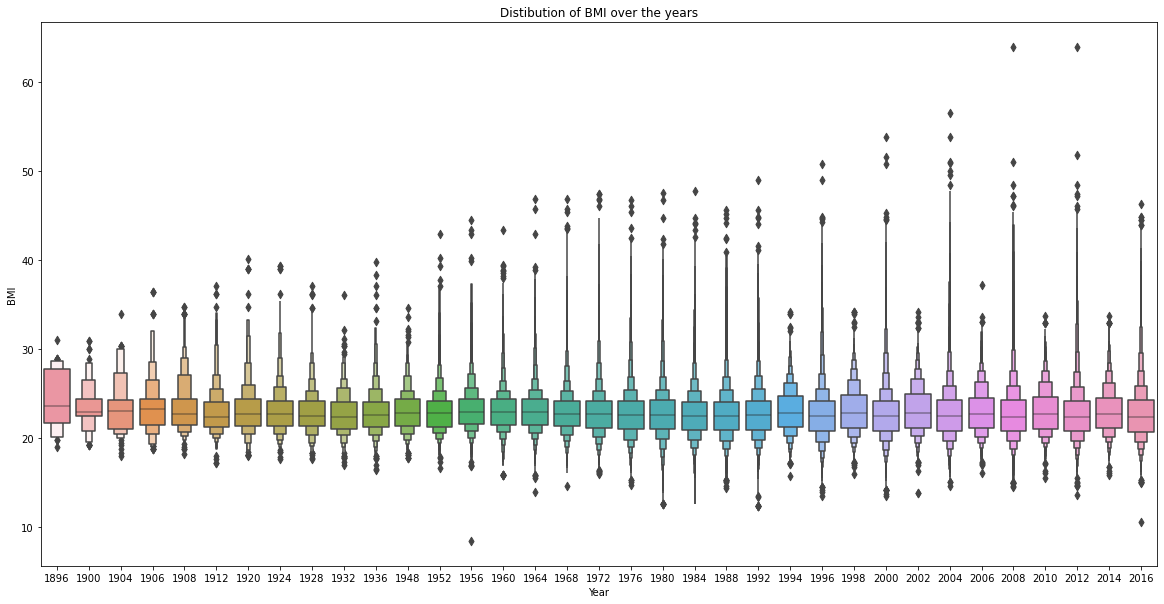

In [17]:
#6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olimpics=pd.read_csv('athlete_events.csv')
olimpics=olimpics.dropna(subset=['Weight'])
olimpics=olimpics.dropna(subset=['Height'])
olimpics=olimpics.reset_index(drop=True)

olimpics['BMI']=olimpics['Weight']/((olimpics['Height']/100)**2)

plt.figure(figsize=(20,10))
sns.boxenplot(x='Year',y='BMI',data=olimpics)
plt.title('Distibution of BMI over the years')